# Fermi Surfaces in different coordinate systems

/var/folders/rf/jr9s2_790538fn69t4thzxz00000gn/T/ipykernel_30824/1050498282.py:12: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(1/(((np.sin(P)**2)-(np.cos(P)**2))))


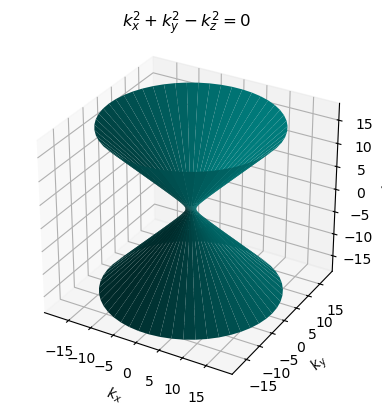

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

t = np.linspace(0, 2 * np.pi, 1000)
p = np.linspace(0, np.pi, 1000)
T,P = np.meshgrid(t,p)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,2,1, projection='3d')
R = np.sqrt(1/(((np.sin(P)**2)-(np.cos(P)**2))))
X = R * np.sin(P) * np.cos(T)
Y = R * np.sin(P) * np.sin(T)
Z = R * np.cos(P)
fig = plt.figure()
plot = ax.plot_surface(X,Y,Z,color = 'teal')

# Set an equal aspect ratio
ax.set_aspect('equal')
ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$k_{z}$')
ax.set_title('$k_{x}^{2} + k_{y}^{2} - k_{z}^{2} =0$')
plt.savefig("Spherical_coordinates")
plt.show()

In [139]:
R = np.sqrt(1/(((np.sin(P)**2)-(np.cos(P)**2))))
R1 = np.sqrt(((np.sin(P)**2)/(np.cos(P)**4))-(np.sqrt(-4*(np.cos(P)**4)+(np.sin(P**2)**2)))/(np.cos(P)**4))

/var/folders/rf/jr9s2_790538fn69t4thzxz00000gn/T/ipykernel_41497/1683704067.py:1: RuntimeWarning: invalid value encountered in sqrt
  R = np.sqrt(1/(((np.sin(P)**2)-(np.cos(P)**2))))


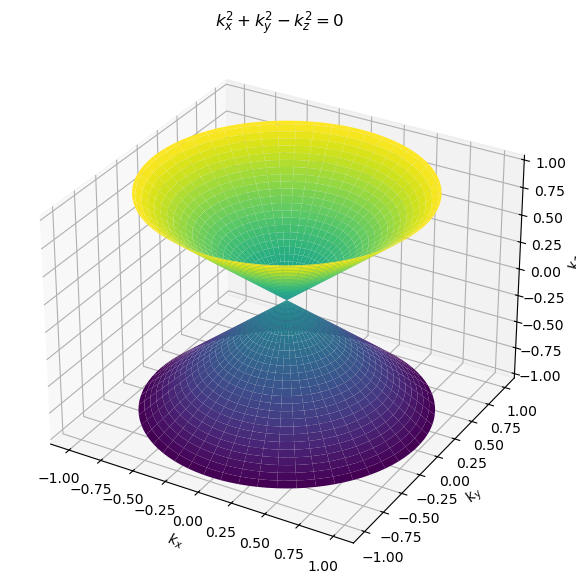

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for z and theta
z = np.linspace(-1, 1, 100)
theta = np.linspace(0, 2 * np.pi, 100)

# Create a meshgrid for z and theta
z, theta = np.meshgrid(z, theta)

# Calculate r for the equation r = z
r = z

# Convert from cylindrical to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$k_{z}$')
ax.set_title('$k_{x}^{2} + k_{y}^{2} - k_{z}^{2} =0$')

plt.show()


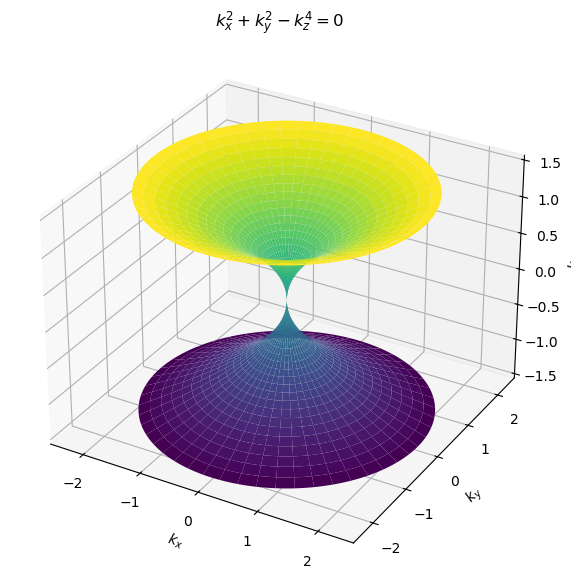

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


z = np.linspace(-1.5, 1.5, 500)
theta = np.linspace(0, 2 * np.pi, 500)
z, theta = np.meshgrid(z, theta)

r = np.abs(z**2)

x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$k_{z}$')
ax.set_title('$k_{x}^{2} + k_{y}^{2} - k_{z}^{4} =0$')

plt.show()


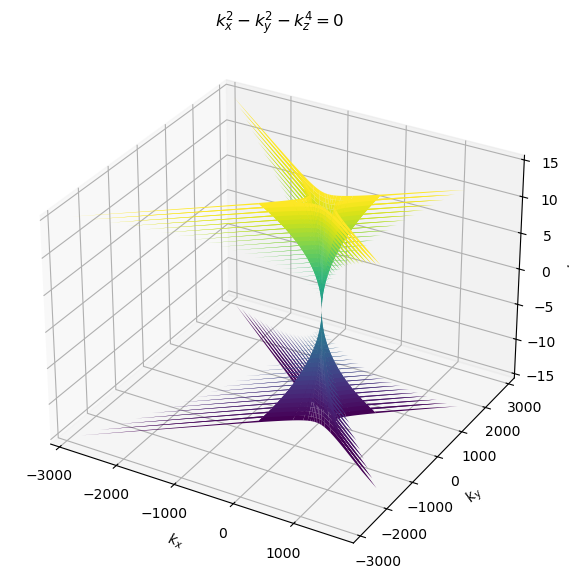

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for z and theta
z = np.linspace(-15, 15, 500)
theta = np.linspace(0,2*np.pi, 500)

# Create a meshgrid
z, theta = np.meshgrid(z, theta)

# Calculate r from the equation r = sqrt(z^4 / cos(2*theta))
r = np.sqrt(np.abs(z)**4 / np.abs(np.cos(2*theta)))

# Convert from cylindrical to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

ax.set_xlabel('$k_{x}$')
ax.set_ylabel('$k_{y}$')
ax.set_zlabel('$k_{z}$')
ax.set_title('$k_{x}^{2} - k_{y}^{2} - k_{z}^{4} =0$')
plt.savefig("HOSP2_fermi_surace")
plt.show()


# 2D DOS

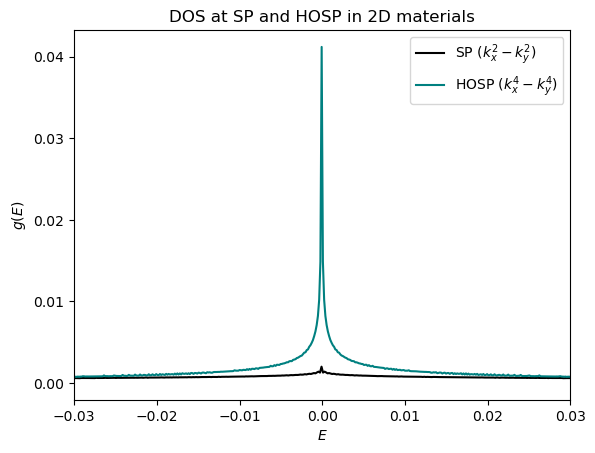

In [90]:
import numpy as np
import matplotlib.pyplot as plt

n = 2000
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky = np.meshgrid(kx,ky)

unit_k_vol = ((2*np.pi/(n))**2)
tot_k = (n**2)

Eval1 = (Kx**2) - (Ky**2)
E_steps = 3000
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)
Emid = []
for i in range(0,E_steps-1):
    emid = ((E[i]+E[i+1])/2)
    Emid.append(emid)

g_arr = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = count/(tot_k)
    g_arr.append(count_norm)
    i+=1

Eval2 = (Kx**4) - (Ky**4)
E_steps2 = 1000
E_lowerbound2 = np.min(Eval2)
E_upperbound2 = np.max(Eval2)
E_unit2 = (E_upperbound2 - E_lowerbound2)/(E_steps2)

E2 = np.linspace(E_lowerbound2,E_upperbound2,E_steps2)
Emid2 = []
for i in range(0,E_steps2-1):
    emid2 = ((E2[i]+E2[i+1])/2)
    Emid2.append(emid2)

g_arr2 = []
for i in range(0,E_steps2):
    Emin = E2[i]
    count = np.sum((Eval2 >= Emin) & (Eval2 < Emin + E_unit2))
    count_norm = count/(tot_k)
    g_arr2.append(count_norm)
    i+=1

Eval3 = (Kx**6) - (Ky**6)
E_steps3 = 1000
E_lowerbound3 = np.min(Eval3)
E_upperbound3 = np.max(Eval3)
E_unit3 = (E_upperbound3 - E_lowerbound3)/(E_steps3)

E3 = np.linspace(E_lowerbound3,E_upperbound3,E_steps3)
Emid3 = []
for i in range(0,E_steps3-1):
    emid3 = ((E3[i]+E3[i+1])/2)
    Emid3.append(emid3)

g_arr3 = []
for i in range(0,E_steps3):
    Emin = E3[i]
    count = np.sum((Eval3 >= Emin) & (Eval3 < Emin + E_unit3))
    count_norm = count/(tot_k)
    g_arr3.append(count_norm)
    i+=1

N1 = np.max(g_arr)
N2 = np.max(g_arr2)

#plt.plot(E2,g_arr3,color = 'cyan',label = "HOSP ($k_{x}^{6} - k_{y}^{6}$)")

plt.plot(E,g_arr,color = 'black',label = "SP ($k_{x}^{2} - k_{y}^{2}$)")

plt.plot(E2,g_arr2,color = 'teal',label = "HOSP ($k_{x}^{4} - k_{y}^{4}$)")

plt.xlim(-0.03,0.03)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.legend()
plt.title('DOS at SP and HOSP in 2D materials')
plt.savefig("DOS at SP and HOSP in 2D materials")
plt.show()

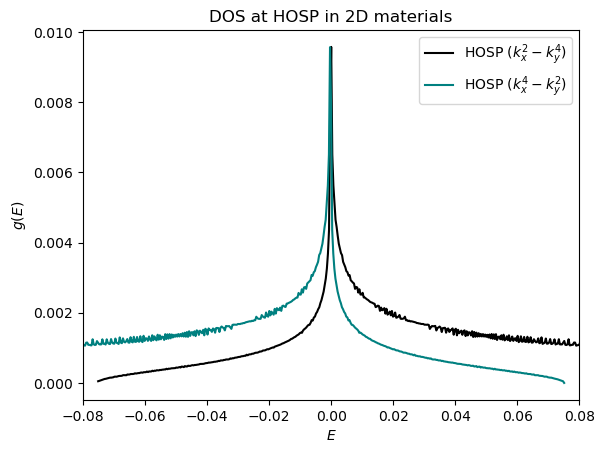

In [91]:
import numpy as np
import matplotlib.pyplot as plt

n = 2000
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky = np.meshgrid(kx,ky)

unit_k_vol = ((2*np.pi/(n))**2)
tot_k = (n**2)

Eval1 = (Kx**2) - (Ky**4)
E_steps = 1000
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)
Emid = []
for i in range(0,E_steps-1):
    emid = ((E[i]+E[i+1])/2)
    Emid.append(emid)

g_arr = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = count/(tot_k)
    g_arr.append(count_norm)
    i+=1

Eval2 = (Kx**4) - (Ky**2)
E_steps2 = 1000
E_lowerbound2 = np.min(Eval2)
E_upperbound2 = np.max(Eval2)
E_unit2 = (E_upperbound2 - E_lowerbound2)/(E_steps2)

E2 = np.linspace(E_lowerbound2,E_upperbound2,E_steps2)
Emid2 = []
for i in range(0,E_steps2-1):
    emid2 = ((E2[i]+E2[i+1])/2)
    Emid2.append(emid2)

g_arr2 = []
for i in range(0,E_steps2):
    Emin = E2[i]
    count = np.sum((Eval2 >= Emin) & (Eval2 < Emin + E_unit2))
    count_norm = count/(tot_k)
    g_arr2.append(count_norm)
    i+=1

N1 = np.max(g_arr)
N2 = np.max(g_arr2)
plt.plot(E,g_arr,color = 'black',label = "HOSP ($k_{x}^{2} - k_{y}^{4}$)")
plt.plot(E2,g_arr2,color = 'teal',label = "HOSP ($k_{x}^{4} - k_{y}^{2}$)")
plt.xlim(-0.08,0.08)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.legend()
plt.title('DOS at HOSP in 2D materials')
plt.savefig("DOS at different HOSP's in 2D materials")
plt.show()

[ 0.54357075 -1.03557026  0.41195501]
[[0.00132242 0.00251937 0.00087941]
 [0.00251937 0.00515335 0.0020735 ]
 [0.00087941 0.0020735  0.00120329]]


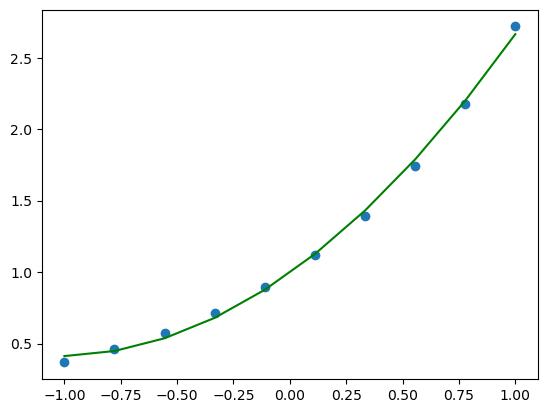

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

x = np.linspace(-1,1,10)

y1 = []
for i in range (0,10):
    y = np.exp(x[i])
    y1.append(y)

# Fitting
def model_f(x,a,b,c):
    return a*(x-b)**2 + c

popt,pcov = curve_fit(model_f,x,y1,p0 = [0.25,-1,0.3678])
print(popt)
print(pcov)

a_opt,b_opt,c_opt = popt
y_model = model_f(x,a_opt,b_opt,c_opt)

plt.scatter(x,y1)
plt.plot(x,y_model,color = 'green')
plt.show()

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

n = 200
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky = np.meshgrid(kx,ky)

unit_k_vol = ((2*np.pi/(n))**2)
tot_k = (n**2)

Eval1 = (Kx**2) - (Ky**4)
E_steps = 100
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = count/(tot_k)
    g_arr.append(count_norm)

log_g_arr = []
for i in range(0,E_steps):
    log_g = np.log(g_arr[i])
    log_g_arr.append(log_g)

log_E_arr = []
for i in range(0,E_steps):
    log_E = np.log(E[i])
    log_E_arr.append(log_E)

def lin_fit(x,a,b):
    return a*log_E_arr + b

popt,pcov = curve_fit(lin_fit,log_g_arr,log_E_arr,p0 = [0.001,00.26,0])

a_opt,b_opt = popt
y_model = power_fit(E,a_opt,b_opt)
plt.scatter(E,g_arr)
plt.plot(E,y_model,color = 'green')
plt.show()

/var/folders/rf/jr9s2_790538fn69t4thzxz00000gn/T/ipykernel_31610/3935442072.py:36: RuntimeWarning: invalid value encountered in log
  log_E = np.log(E[i])


ValueError: array must not contain infs or NaNs

# 3D DOS

## HOSP-1

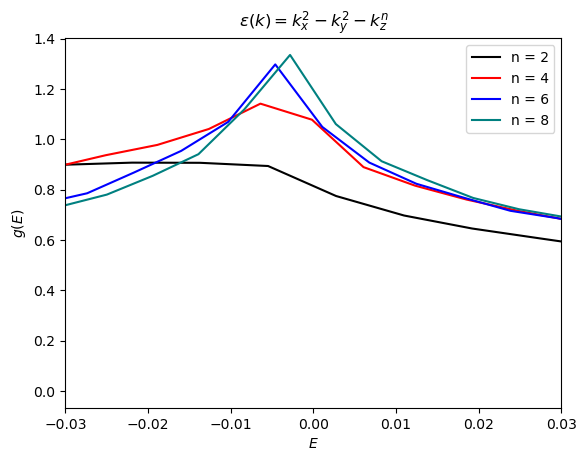

In [74]:
import numpy as np
import matplotlib.pyplot as plt

n = 201
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
kz = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky,Kz = np.meshgrid(kx,ky,kz)

unit_k_vol = ((2*np.pi/(6*n))**3)
tot_k = (n**3)

Eval1 = ((Kx**2) - (Ky**2) - (Kz**2))
E_steps = 101
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr1 = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr1.append(count_norm)
    
Eval2 = ((Kx**2) - (Ky**2) - (Kz**4))
E_lowerbound2 = np.min(Eval2)
E_upperbound2 = np.max(Eval2)
E_unit2 = (E_upperbound2 - E_lowerbound2)/(E_steps)

E2 = np.linspace(E_lowerbound2,E_upperbound2,E_steps)

g_arr2 = []
for i in range(0,E_steps):
    Emin = E2[i]
    count = np.sum((Eval2 >= Emin) & (Eval2 < Emin + E_unit2))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr2.append(count_norm)

Eval3 = ((Kx**2) - (Ky**2) - (Kz**6))
E_lowerbound3 = np.min(Eval3)
E_upperbound3 = np.max(Eval3)
E_unit3 = (E_upperbound3 - E_lowerbound3)/(E_steps)

E3 = np.linspace(E_lowerbound3,E_upperbound3,E_steps)

g_arr3 = []
for i in range(0,E_steps):
    Emin = E3[i]
    count = np.sum((Eval3 >= Emin) & (Eval3 < Emin + E_unit3))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr3.append(count_norm)

Eval4 = ((Kx**2) - (Ky**2) - (Kz**8))
E_lowerbound4 = np.min(Eval4)
E_upperbound4 = np.max(Eval4)
E_unit4 = (E_upperbound3 - E_lowerbound3)/(E_steps)

E4 = np.linspace(E_lowerbound4,E_upperbound4,E_steps)

g_arr4 = []
for i in range(0,E_steps):
    Emin = E4[i]
    count = np.sum((Eval4 >= Emin) & (Eval4 < Emin + E_unit3))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr4.append(count_norm)

plt.plot(E,g_arr1,color='black',label = "n = 2")
plt.plot(E2,g_arr2,color='red',label = "n = 4")
plt.plot(E3,g_arr3,color='blue',label = "n = 6")
plt.plot(E4,g_arr4,color='teal',label = "n = 8")
plt.xlim(-0.03,0.03)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.title('$\epsilon(k) = k_{x}^{2} - k_{y}^{2} - k_{z}^{n}$')
plt.legend()
# plt.savefig("DOS_HOSP2_n")
plt.show()

## HOSP - 2 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 101
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
kz = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky,Kz = np.meshgrid(kx,ky,kz)

unit_k_vol = ((2*np.pi/(6*n))**3)
tot_k = (n**3)

Eval1 = ((Kx**2) + (Ky**2) - (Kz**2))
E_steps = 101
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr1 = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr1.append(count_norm)
    
Eval2 = ((Kx**2) + (Ky**2) - (Kz**4))
E_lowerbound2 = np.min(Eval2)
E_upperbound2 = np.max(Eval2)
E_unit2 = (E_upperbound2 - E_lowerbound2)/(E_steps)

E2 = np.linspace(E_lowerbound2,E_upperbound2,E_steps)

g_arr2 = []
for i in range(0,E_steps):
    Emin = E2[i]
    count = np.sum((Eval2 >= Emin) & (Eval2 < Emin + E_unit2))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr2.append(count_norm)

Eval3 = ((Kx**2) + (Ky**2) - (Kz**6))
E_lowerbound3 = np.min(Eval3)
E_upperbound3 = np.max(Eval3)
E_unit3 = (E_upperbound3 - E_lowerbound3)/(E_steps)

E3 = np.linspace(E_lowerbound3,E_upperbound3,E_steps)

g_arr3 = []
for i in range(0,E_steps):
    Emin = E3[i]
    count = np.sum((Eval3 >= Emin) & (Eval3 < Emin + E_unit3))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr3.append(count_norm)

plt.plot(E,g_arr1,color='black',label = "n = 2")
plt.plot(E2,g_arr2,color='red',label = "n = 4")
plt.plot(E3,g_arr3,color='blue',label = "n = 6")
plt.xlim(-0.3,0.3)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.title('$\epsilon(k) = k_{x}^{2} - k_{y}^{2} - k_{z}^{4}$')
plt.legend()
# plt.savefig("DOS_HOSP2_n4")
plt.show()

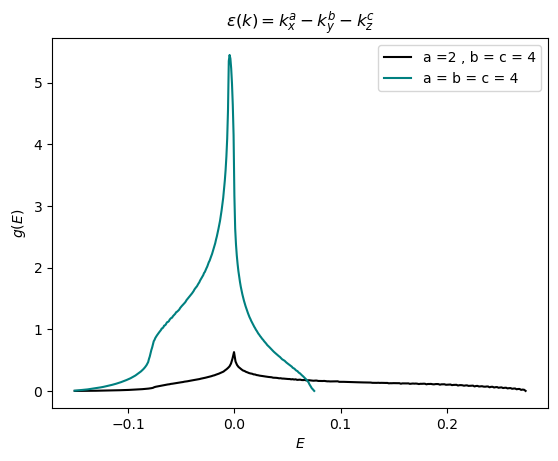

In [82]:
import numpy as np
import matplotlib.pyplot as plt

n = 501
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
kz = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky,Kz = np.meshgrid(kx,ky,kz)

unit_k_vol = ((2*np.pi/(6*n))**3)
tot_k = (n**3)

Eval1 = ((Kx**2) - (Ky**4) - (Kz**4))
E_steps = 301
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr1 = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr1.append(count_norm)
    
Eval4 = ((Kx**4) - (Ky**4) - (Kz**4))
E_lowerbound4 = np.min(Eval4)
E_upperbound4 = np.max(Eval4)
E_unit4 = (E_upperbound3 - E_lowerbound3)/(E_steps)

E4 = np.linspace(E_lowerbound4,E_upperbound4,E_steps)

g_arr4 = []
for i in range(0,E_steps):
    Emin = E4[i]
    count = np.sum((Eval4 >= Emin) & (Eval4 < Emin + E_unit3))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr4.append(count_norm)

plt.plot(E,g_arr1,color='black',label = "a =2 , b = c = 4")
plt.plot(E4,g_arr4,color='teal',label = "a = b = c = 4")
# plt.xlim(-0.03,0.03)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.title('$\epsilon(k) = k_{x}^{a} - k_{y}^{b} - k_{z}^{c}$')
plt.legend()
plt.savefig("DOS_HOSP2_diff")
plt.show()

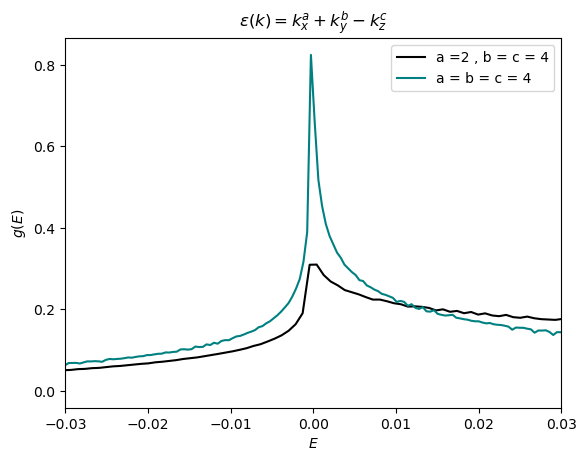

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 501
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
kz = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky,Kz = np.meshgrid(kx,ky,kz)

unit_k_vol = ((2*np.pi/(6*n))**3)
tot_k = (n**3)

Eval1 = ((Kx**2) + (Ky**4) - (Kz**4))
E_steps = 501
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr1 = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr1.append(count_norm)
    
Eval4 = ((Kx**4) + (Ky**4) - (Kz**4))
E_lowerbound4 = np.min(Eval4)
E_upperbound4 = np.max(Eval4)
E_unit4 = (E_upperbound4 - E_lowerbound4)/(E_steps)

E4 = np.linspace(E_lowerbound4,E_upperbound4,E_steps)

g_arr4 = []
for i in range(0,E_steps):
    Emin = E4[i]
    count = np.sum((Eval4 >= Emin) & (Eval4 < Emin + E_unit4))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr4.append(count_norm)

plt.plot(E,g_arr1,color='black',label = "a =2 , b = c = 4")
plt.plot(E4,g_arr4,color='teal',label = "a = b = c = 4")
plt.xlim(-0.03,0.03)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.title('$\epsilon(k) = k_{x}^{a} + k_{y}^{b} - k_{z}^{c}$')
plt.legend()
# plt.savefig("DOS_HOSP1_diff")
plt.show()

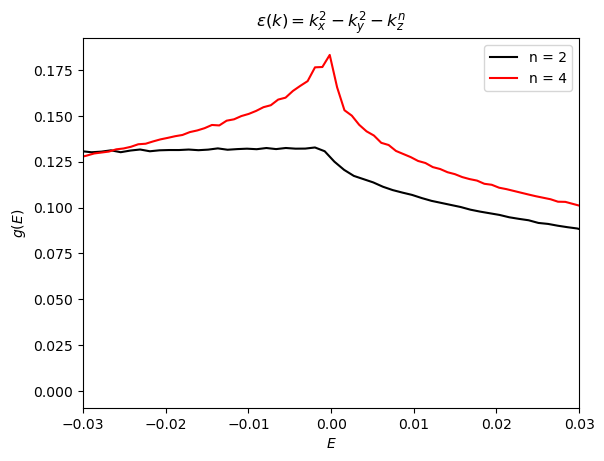

In [89]:
import numpy as np
import matplotlib.pyplot as plt

n = 701
kx = np.linspace(-np.pi/6,np.pi/6,n)
ky = np.linspace(-np.pi/6,np.pi/6,n)
kz = np.linspace(-np.pi/6,np.pi/6,n)
Kx,Ky,Kz = np.meshgrid(kx,ky,kz)

unit_k_vol = ((2*np.pi/(6*n))**3)
tot_k = (n**3)

Eval1 = ((Kx**2) - (Ky**2) - (Kz**2))
E_steps = 701
E_lowerbound = np.min(Eval1)
E_upperbound = np.max(Eval1)
E_unit = (E_upperbound - E_lowerbound)/(E_steps)

E = np.linspace(E_lowerbound,E_upperbound,E_steps)

g_arr1 = []
for i in range(0,E_steps):
    Emin = E[i]
    count = np.sum((Eval1 >= Emin) & (Eval1 < Emin + E_unit))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr1.append(count_norm)
    
Eval2 = ((Kx**2) - (Ky**2) - (Kz**4))
E_lowerbound2 = np.min(Eval2)
E_upperbound2 = np.max(Eval2)
E_unit2 = (E_upperbound2 - E_lowerbound2)/(E_steps)

E2 = np.linspace(E_lowerbound2,E_upperbound2,E_steps)

g_arr2 = []
for i in range(0,E_steps):
    Emin = E2[i]
    count = np.sum((Eval2 >= Emin) & (Eval2 < Emin + E_unit2))
    count_norm = (count*4*(np.pi**2))/(tot_k)
    g_arr2.append(count_norm)


plt.plot(E,g_arr1,color='black',label = "n = 2")
plt.plot(E2,g_arr2,color='red',label = "n = 4")
#plt.plot(E3,g_arr3,color='blue',label = "n = 6")
#plt.plot(E4,g_arr4,color='teal',label = "n = 8")
plt.xlim(-0.03,0.03)
plt.xlabel('$E$')
plt.ylabel('$g(E)$')
plt.title('$\epsilon(k) = k_{x}^{2} - k_{y}^{2} - k_{z}^{n}$')
plt.legend()
# plt.savefig("DOS_HOSP2_n")
plt.show()

# DOS Fittings

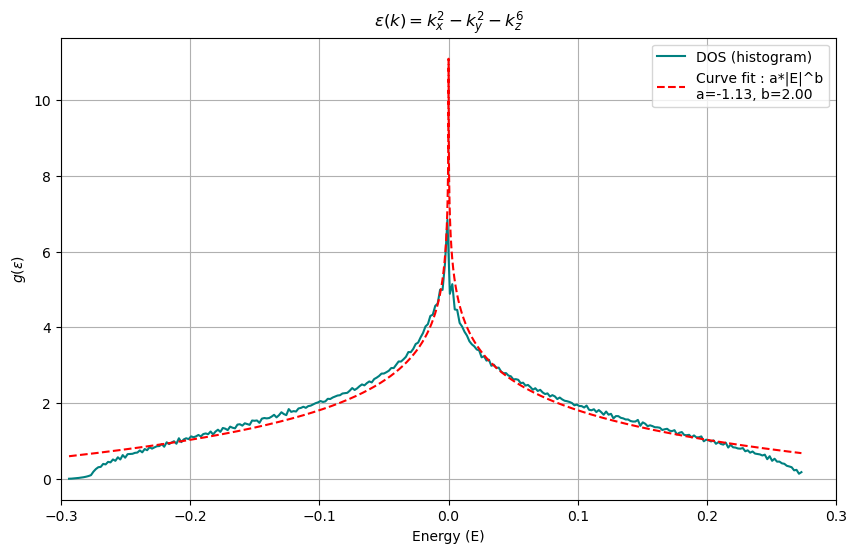

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
n_points = 301  # Number of points for kx, ky, kz
k_range = np.linspace(-np.pi/6, np.pi/6, n_points)

# Generate kx, ky, kz
kx, ky, kz = np.meshgrid(k_range, k_range, k_range)
kx = kx.flatten()
ky = ky.flatten()
kz = kz.flatten()

# Energy dispersion relation
E = kx**2 - ky**2 - kz**6

# Create a histogram of the energy values to compute DOS
E_bins = 301  # Number of bins
dos, edges = np.histogram(E, bins=E_bins, density=True)

# Midpoints of bins
E_midpoints = (edges[:-1] + edges[1:]) / 2

# Define the power law fitting function
def log(E, a, b):
    return a * np.log(np.abs(-E*b))

# Initial guess for the parameters
initial_guess = [1, -0.5]

# Curve fitting
popt, pcov = curve_fit(log, E_midpoints, dos, p0=initial_guess)

# Generate data for the fitted curve
E_fit = np.linspace(min(E_midpoints), max(E_midpoints), 7000)
dos_fit = log(E_fit, *popt)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(E_midpoints, dos, 'teal', label='DOS (histogram)')
plt.plot(E_fit, dos_fit, 'r--', label=f'Curve fit : a*|E|^b\na={popt[0]:.2f}, b={popt[1]:.2f}')
plt.xlim(-0.3,0.3)
plt.xlabel('Energy (E)')
plt.ylabel('$g(\epsilon)$')
plt.title('$\epsilon(k) = k_{x}^{2} - k_{y}^{2} - k_{z}^{6} $')
plt.legend()
plt.savefig("HOSP2_Fit")
plt.grid(True)
plt.savefig("fit_DOS_HOSP2")
plt.show()

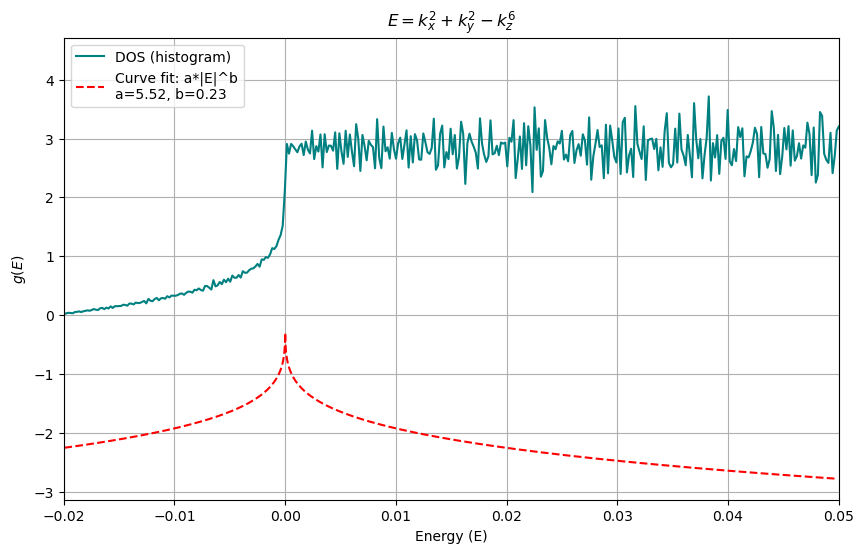

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
n_points = 301  # Number of points for kx, ky, kz
k_range = np.linspace(-np.pi/6, np.pi/6, n_points)

# Generate kx, ky, kz
kx, ky, kz = np.meshgrid(k_range, k_range, k_range)
kx = kx.flatten()
ky = ky.flatten()
kz = kz.flatten()

# Energy dispersion relation
E = kx**2 + ky**2 - kz**6

# Create a histogram of the energy values to compute DOS
E_bins = 3001  # Number of bins
dos, edges = np.histogram(E, bins=E_bins, density=True)

# Midpoints of bins
E_midpoints = (edges[:-1] + edges[1:]) / 2

# Define the power law fitting function
def power_law(E, a, b):
    return a * np.abs(E)**b

# Initial guess for the parameters
initial_guess1 = [0, 3]

# Focus on the region around E ≈ 0 for fitting
fit_mask = (E_midpoints > -0.02) & (E_midpoints < 0.05)

# Curve fitting
popt, pcov = curve_fit(power_law, E_midpoints[fit_mask], dos[fit_mask], p0=initial_guess1)

# Generate data for the fitted curve
E_fit = np.linspace(min(E_midpoints[fit_mask]), max(E_midpoints[fit_mask]), 7000)
dos_fit = power_law(E_fit, *popt)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(E_midpoints, dos, 'teal', label='DOS (histogram)')
plt.xlim(-0.02, 0.05)
plt.plot(E_fit, -dos_fit, 'r--', label=f'Curve fit: a*|E|^b\na={popt[0]:.2f}, b={popt[1]:.2f}')
plt.xlabel('Energy (E)')
plt.ylabel('$g(E)$')
plt.title('$E = k_x^2 + k_y^2 - k_z^6$')
plt.legend()
plt.grid(True)
plt.show()


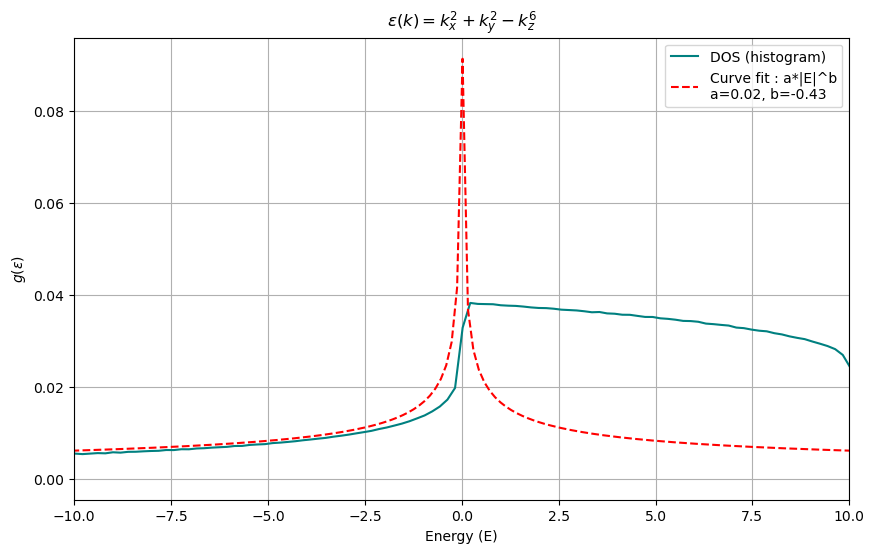

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
n_points = 501  # Number of points for kx, ky, kz
k_range = np.linspace(-np.pi, np.pi, n_points)

# Generate kx, ky, kz
kx, ky, kz = np.meshgrid(k_range, k_range, k_range)
kx = kx.flatten()
ky = ky.flatten()
kz = kz.flatten()

# Energy dispersion relation
E = kx**2 + ky**2 - kz**6

# Create a histogram of the energy values to compute DOS
E_bins = 5001  # Number of bins
dos, edges = np.histogram(E, bins=E_bins, density=True)

# Midpoints of bins
E_midpoints = (edges[:-1] + edges[1:]) / 2

# Define the power law fitting function
def power_law(E, a, b):
    return a * np.abs(E)**b

# Initial guess for the parameters
initial_guess = [0, 0.039 ]

# Curve fitting
popt, pcov = curve_fit(power_law, E_midpoints, dos, p0=initial_guess)

# Generate data for the fitted curve
E_fit = np.linspace(min(E_midpoints), max(E_midpoints), 7000)
dos_fit = power_law(E_fit, *popt)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(E_midpoints, dos, 'teal', label='DOS (histogram)')
plt.plot(E_fit, dos_fit, 'r--', label=f'Curve fit : a*|E|^b\na={popt[0]:.2f}, b={popt[1]:.2f}')
plt.xlim(-10,10)
plt.xlabel('Energy (E)')
plt.ylabel('$g(\epsilon)$')
plt.title('$\epsilon(k) = k_{x}^{2} + k_{y}^{2} - k_{z}^{6} $')
plt.legend()
# plt.savefig("HOSP1_Fit")
plt.grid(True)
plt.show()

# Band Structure

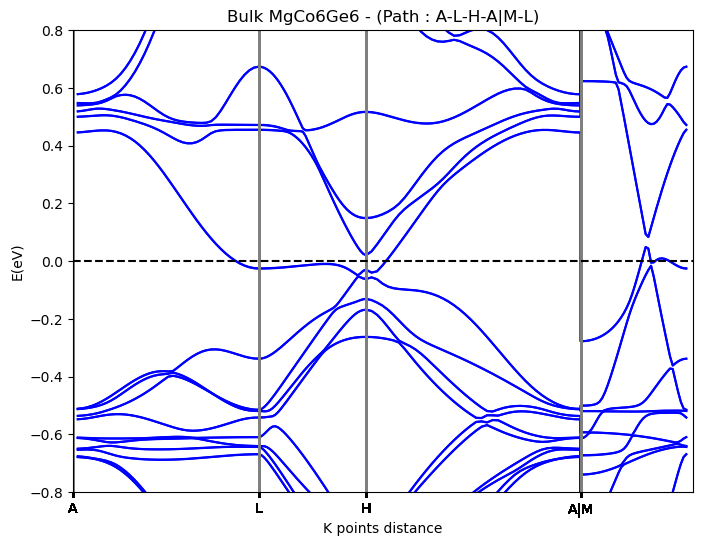

In [65]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('band_structure.txt')
x_arr = np.linspace(0,0.38,100)
y_arr = np.linspace(-0.8,0.8,100)

plt.figure(figsize=(8,6))

for i in range (1,112):
    x_values = data[(160)*(i-1)+1:160*i,0]
    y_values = data[160*(i-1)+1:160*i,1]
    plt.plot(x_values,y_values,color = 'blue')

x_values1 = data[:,0]
y_values1 = data[:,1]
positions = []
labels = ["A","L","H","A|M","L"]
tick_labels = []
for j in range(0,len(x_values1),40):
    plt.axvline(x=x_values1[j],color = 'grey',linewidth = 1)
    positions.append(x_values1[j])
    tick_labels.append(labels[(j//40)%len(labels)-4])



plt.plot(x_arr,0*y_arr,color = 'black',linestyle = '--')
plt.xlabel('K points distance')
plt.ylabel('E(eV)')
plt.ylim(-0.8,0.8)
plt.xlim(0,0.38)
plt.xticks(positions,tick_labels)
plt.title('Bulk MgCo6Ge6 - (Path : A-L-H-A|M-L)')
plt.savefig("MgCo6Ge6_band_structure")
plt.show()

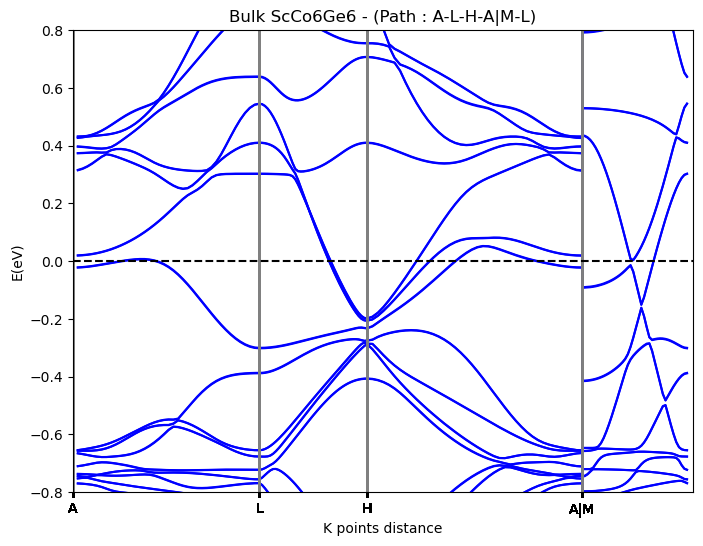

In [69]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('ScCo6Ge6.txt')
x_arr = np.linspace(0,0.38,100)
y_arr = np.linspace(-0.8,0.8,100)

plt.figure(figsize=(8,6))

for i in range (1,112):
    x_values = data[(160)*(i-1)+1:160*i,0]
    y_values = data[160*(i-1)+1:160*i,1]
    plt.plot(x_values,y_values,color = 'blue')

x_values1 = data[:,0]
y_values1 = data[:,1]
positions = []
labels = ["A","L","H","A|M","L"]
tick_labels = []
for j in range(0,len(x_values1),40):
    plt.axvline(x=x_values1[j],color = 'grey',linewidth = 1)
    positions.append(x_values1[j])
    tick_labels.append(labels[(j//40)%len(labels)-4])



plt.plot(x_arr,0*y_arr,color = 'black',linestyle = '--')
plt.xlabel('K points distance')
plt.ylabel('E(eV)')
plt.ylim(-0.8,0.8)
plt.xlim(0,0.38)
plt.xticks(positions,tick_labels)
plt.title('Bulk ScCo6Ge6 - (Path : A-L-H-A|M-L)')
plt.savefig("ScCo6Ge6_band_structure")
plt.show()

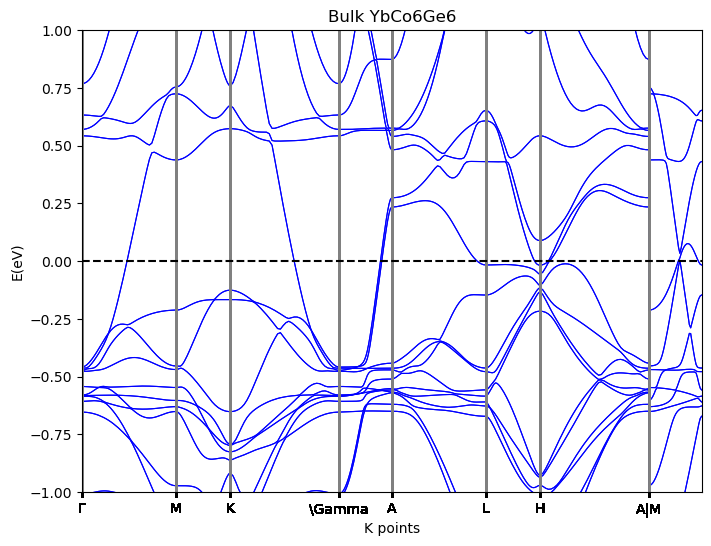

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('YbCo6Ge6_raw.txt')
x_arr = np.linspace(0,0.749,100)
y_arr = np.linspace(-0.8,0.8,100)

plt.figure(figsize=(8,6))

for i in range (1,104):
    x_values = data[(320)*(i-1)+1:320*i,0]
    y_values = data[320*(i-1)+1:320*i,1]
    plt.plot(x_values,y_values,color = 'blue',linewidth = 0.8)

x_values1 = data[:,0]
y_values1 = data[:,1]
positions = []
labels = ["$\Gamma$","M","K","\Gamma","A","L","H","A|M","L"]
tick_labels = []
for j in range(0,len(x_values1),40):
    plt.axvline(x=x_values1[j],color = 'grey',linewidth = 1)
    positions.append(x_values1[j])
    tick_labels.append(labels[(j//40)%len(labels)-5])



plt.plot(x_arr,0*y_arr,color = 'black',linestyle = '--')
plt.xlabel('K points')
plt.ylabel('E(eV)')
plt.ylim(-1,1)
plt.xlim(0,0.749)
plt.xticks(positions,tick_labels)
plt.title('Bulk YbCo6Ge6')
plt.savefig("YbCo6Ge6_band_structure")
plt.show()

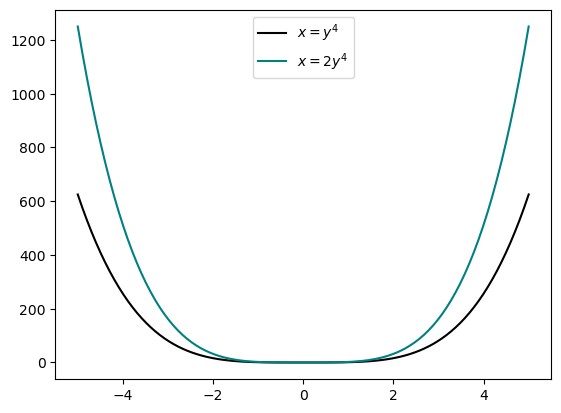

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

plt.plot(x,y**4,label = "$x = y^{4}$",color = 'black')
plt.plot(x,2*y**4,color = 'teal',label = "$x = 2y^{4}$")
plt.legend()
plt.savefig("Explanation")
plt.show()

Interpolating polynomial equation (degree 4):
       4            3         2
-2613 x + 0.005176 x + 2.619 x - 2.504e-06 x - 0.01561


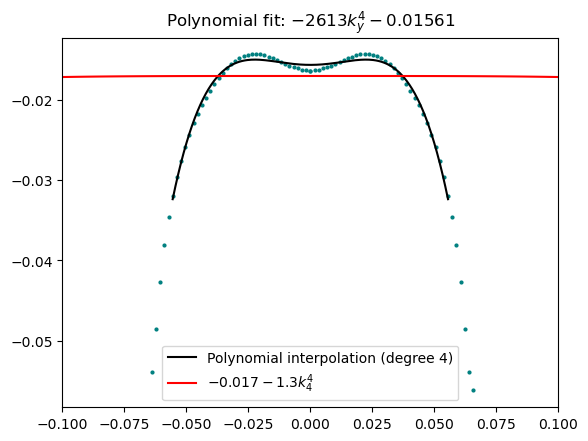

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.1,0.1,100)
y = np.linspace(-0.1,0.1,100)

y_func = []
for i in range(0,len(x)):
    y = -1.3*x[i]**4-0.017
    y_func.append(y)

data = np.loadtxt('Yb_fit.txt')

i = 85
x_values = data[(360)*(i-1)+101:(360)*(i-1)+140,0]
y_values = data[(360)*(i-1)+101:(360)*(i-1)+140,1]

i = 85
x_values1 = data[(360)*(i-1)+81:(360)*(i-1)+160,0]
y_values1 = data[(360)*(i-1)+81:(360)*(i-1)+160,1]

N = np.argmin(y_values)
x_shift = []
for i in range(0,len(x_values1)):
    x_new = x_values1[i]-x_values[N]
    x_shift.append(x_new)
plt.scatter(x_shift,y_values1,color = 'teal',s = 4)

x_fit = x_shift[5:73]
y_fit = y_values1[5:73]

# Fit a 2nd degree polynomial
degree = 4
coeffs = np.polyfit(x_fit, y_fit, degree)
poly = np.poly1d(coeffs)

# Print the polynomial equation
print(f'Interpolating polynomial equation (degree {degree}):')
print(poly)

# Generate x values for plotting the interpolation
#x_interp = np.linspace(min(x_fit), max(x_fit), 200)
#y_interp = poly(x_interp)
plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.1)
plt.plot(x_interp, y_interp, color = 'black', label=f'Polynomial interpolation (degree {degree})' )
plt.plot(x,y_func,'r-',label = "$-0.017-1.3k_{4}^{4}$")
plt.title("Polynomial fit: $-2613k_{y}^{4} - 0.01561$")
plt.legend()
plt.show()

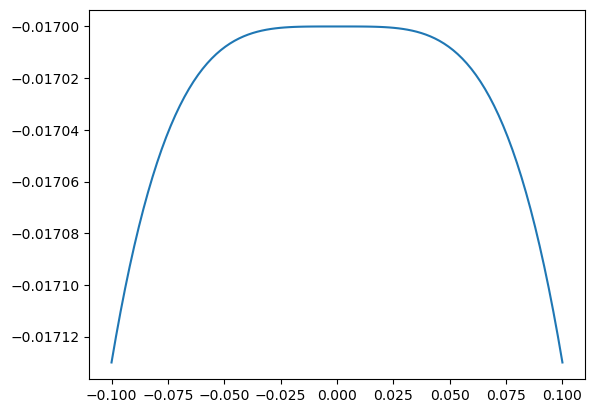

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.1,0.1,100)
y = np.linspace(-0.1,0.1,100)

y_func = []
for i in range(0,len(x)):
    y = -1.3*x[i]**4-0.017
    y_func.append(y)

plt.plot(x,y_func)

-0.421418
Interpolating polynomial equation (degree 4):
            4         3         2
-3.544e+04 x + 280.8 x + 4.431 x - 0.01975 x - 0.1452


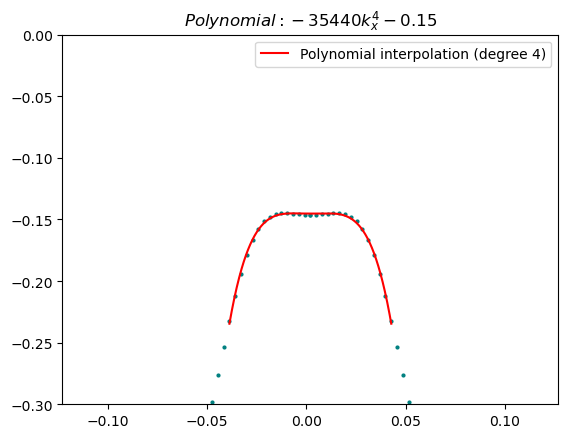

In [38]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Yb_fit.txt')

i = 84
x_values1 = data[(360)*(i-1)+35:(360)*(i-1)+45,0]
y_values1 = data[(360)*(i-1)+35:(360)*(i-1)+45,1]

i = 84
x_values = data[(360)*(i-1):(360)*(i-1)+80,0]
y_values = data[(360)*(i-1):(360)*(i-1)+80,1]

N = np.argmin(y_values1)
print(y_values[N])
x_shift = []
for i in range(0,len(x_values)):
    x_new = x_values[i]-x_values[N]-0.10
    x_shift.append(x_new)
plt.scatter(x_shift,y_values,color = 'teal',s = 4)

x_fit = x_shift[25:55]
y_fit = y_values[25:55]

# Fit a 2nd degree polynomial
degree = 4
coeffs = np.polyfit(x_fit, y_fit, degree)
poly = np.poly1d(coeffs)

# Print the polynomial equation
print(f'Interpolating polynomial equation (degree {degree}):')
print(poly)

# Generate x values for plotting the interpolation
x_interp = np.linspace(min(x_fit), max(x_fit), 600)
y_interp = poly(x_interp)
#plt.xlim(0.055,0.16)
plt.ylim(-0.30,0)
plt.plot(x_interp, y_interp, 'r-', label=f'Polynomial interpolation (degree {degree})' )
plt.legend()
plt.title("$Polynomial : -35440k_{x}^{4} - 0.15$")
plt.savefig("xfit_HOSP2")
plt.show()